# Predict Survival of Patients with Heart Failure from the Patient's Medical Records

### Group Members: Sharon Marfatia, Lawrence Ma, Gabriel Ieong

### Introduction:
Cardiovascular diseases (CVD) cause approximately 17 million deaths worldwide every year. Heart failure is a common type of CVD, and it occurs when the heart is unable to pump sufficient blood to meet the body’s needs. This analysis will use machine learning to investigate a crucial predictive question - **will a patient with heart failure survive, and what medical factors predict such an outcome?** The data set that will be used to answer this question contains the medical records (EHRs) of 299 heart failure patients collected at the Faisalabad Institute of Cardiology and Allied Hospital.

|Variables|Description|
|---------|-----------|
|Age (Integer)|Range from 40 – 95 years old|
|Anaemia (Boolean)|Lack of hemoglobin or red blood cells|
|High Blood Pressure (Boolean)|Force of blood against artery walls|
|Creatinine phosphokinase (mcg/L)|Amount of CPK enzyme in the blood|
|Diabetes (Boolean)|Lack of insulin|
|Ejection Fraction (%)|Blood pumped from the heart during a single contraction|
|Sex (Boolean)|Female or male|
|Platelets (kiloplatelets/mL)|Amount of platelets (cells which help blood clots)|
|Serum creatinine (mg/dL)|Level of creatinine in the blood|
|Serum sodium (mEq/L)|Level of sodium in the blood|
|Smoking (Boolean)|Whether patient smokes|
|Time (Integer)|Clinic follow-up in days|
|Death event (Boolean)|Died during follow-up period|

In [2]:
# The packages we need to load are tidyverse, repr, tidymodels, ggplot2, and GGally. We have done so below.
library(tidyverse)
library(repr)
library(tidymodels)
library("ggplot2")
library("GGally")
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

Parsed with column specification:
cols(
  age = col_double(),
  anaemia = col_double(),
  creatinine_phosphokinase = col_double(),
  diabetes = col_double(),
  ejection_fraction = col_double(),
  high_blood_pressure = col_double(),
  platelets = col_double(),
  serum_creatinine = col_double(),
  serum_sodium = col_double(),
  sex = col_double(),
  smoking = col_double(),
  time = col_double(),
  DEATH_EVENT = col_double()
)



age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
75,0,582,0,20,1,265000,1.9,130,1,0,4,1
55,0,7861,0,38,0,263358,1.1,136,1,0,6,1
65,0,146,0,20,0,162000,1.3,129,1,1,7,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
45,0,2060,1,60,0,742000,0.8,138,0,0,278,0
45,0,2413,0,38,0,140000,1.4,140,1,1,280,0
50,0,196,0,45,0,395000,1.6,136,1,1,285,0


# We have used the URL that contains the data and directly read it using the read_csv() function below. We have not stored the
# data locally. This makes our proposal reproducible. 


In [ ]:

set.seed(400)

url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv"
heart_failure <- read_csv(url)
heart_failure


In [4]:
heart_failure <- heart_failure %>%
            mutate(anaemia = as_factor(anaemia),
                   diabetes = as_factor(diabetes),
                   sex = as_factor(sex),
                   high_blood_pressure = as_factor(high_blood_pressure),
                   smoking = as_factor(smoking),
                   DEATH_EVENT = as_factor(DEATH_EVENT))

levels(heart_failure$anaemia) <- c("no", "yes")
levels(heart_failure$diabetes) <- c("no", "yes")
levels(heart_failure$sex) <- c("female", "male")
levels(heart_failure$high_blood_pressure) <- c("no", "yes")
levels(heart_failure$smoking) <- c("no", "yes")
levels(heart_failure$DEATH_EVENT) <- c("no", "yes")



heart_failure

age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
<dbl>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>
75,no,582,no,20,yes,265000,1.9,130,male,no,4,yes
55,no,7861,no,38,no,263358,1.1,136,male,no,6,yes
65,no,146,no,20,no,162000,1.3,129,male,yes,7,yes
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
45,no,2060,yes,60,no,742000,0.8,138,female,no,278,no
45,no,2413,no,38,no,140000,1.4,140,male,yes,280,no
50,no,196,no,45,no,395000,1.6,136,male,yes,285,no


In [5]:
heart_failure_split <- initial_split(heart_failure, prop = 0.85, strata = DEATH_EVENT)
heart_failure_train <- training(heart_failure_split)
heart_failure_test <- testing(heart_failure_split)

heart_failure_train

age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
<dbl>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>
55,no,7861,no,38,no,263358,1.1,136,male,no,6,yes
65,no,146,no,20,no,162000,1.3,129,male,yes,7,yes
65,yes,160,yes,20,no,327000,2.7,116,female,no,8,yes
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
45,no,2060,yes,60,no,742000,0.8,138,female,no,278,no
45,no,2413,no,38,no,140000,1.4,140,male,yes,280,no
50,no,196,no,45,no,395000,1.6,136,male,yes,285,no


In [20]:
# The table below shows that in the training set there are 163 survivors (67.92%) and 77 deaths (32.08%).

summarized_train <- heart_failure_train %>%
                    group_by(DEATH_EVENT) %>%
                    summarize(n = n()) %>%
                    mutate(percentate = (n * 100)/nrow(heart_failure_train))

summarized_train

`summarise()` ungrouping output (override with `.groups` argument)



DEATH_EVENT,n,percentate
<fct>,<int>,<dbl>
no,173,67.84314
yes,82,32.15686


In [22]:
# Below is a table of the means of our predictor variables. From this table, we can analyze that, on average, people who had an 
# ejection fraction of approximately 33% and serum creatinine of approximately 1.85 mg/dL died. 

means_data <- heart_failure_train %>%
              group_by(DEATH_EVENT) %>%
              summarize(ejection_fraction_average = mean(ejection_fraction),
                       serum_creatinine_average = mean(serum_creatinine),
                       time_average = mean(time))

means_data

`summarise()` ungrouping output (override with `.groups` argument)



DEATH_EVENT,ejection_fraction_average,serum_creatinine_average,time_average
<fct>,<dbl>,<dbl>,<dbl>
no,40.09827,1.207052,160.15029
yes,33.65854,1.726220,72.52439


In [6]:
heart_failure <- select(heart_failure, ejection_fraction, serum_creatinine, age, serum_sodium, platelets, creatinine_phosphokinase, time,
                        DEATH_EVENT)
heart_failure

# ups_recipe <- recipe(DEATH_EVENT ~ serum_creatinine + ejection_fraction + age + serum_sodium + platelets,
#                      data = heart_failure_train) %>%
#               step_upsample(DEATH_EVENT, over_ratio = 1, skip = FALSE) %>%
#                 prep()

# ups_recipe
# heart_failure_train <- bake(ups_recipe, heart_failure_train)

# heart_failure_train %>%
#   group_by(DEATH_EVENT) %>%
#   summarize(n = n())
                        

ejection_fraction,serum_creatinine,age,serum_sodium,platelets,creatinine_phosphokinase,time,DEATH_EVENT
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
20,1.9,75,130,265000,582,4,yes
38,1.1,55,136,263358,7861,6,yes
20,1.3,65,129,162000,146,7,yes
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
60,0.8,45,138,742000,2060,278,no
38,1.4,45,140,140000,2413,280,no
45,1.6,50,136,395000,196,285,no


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



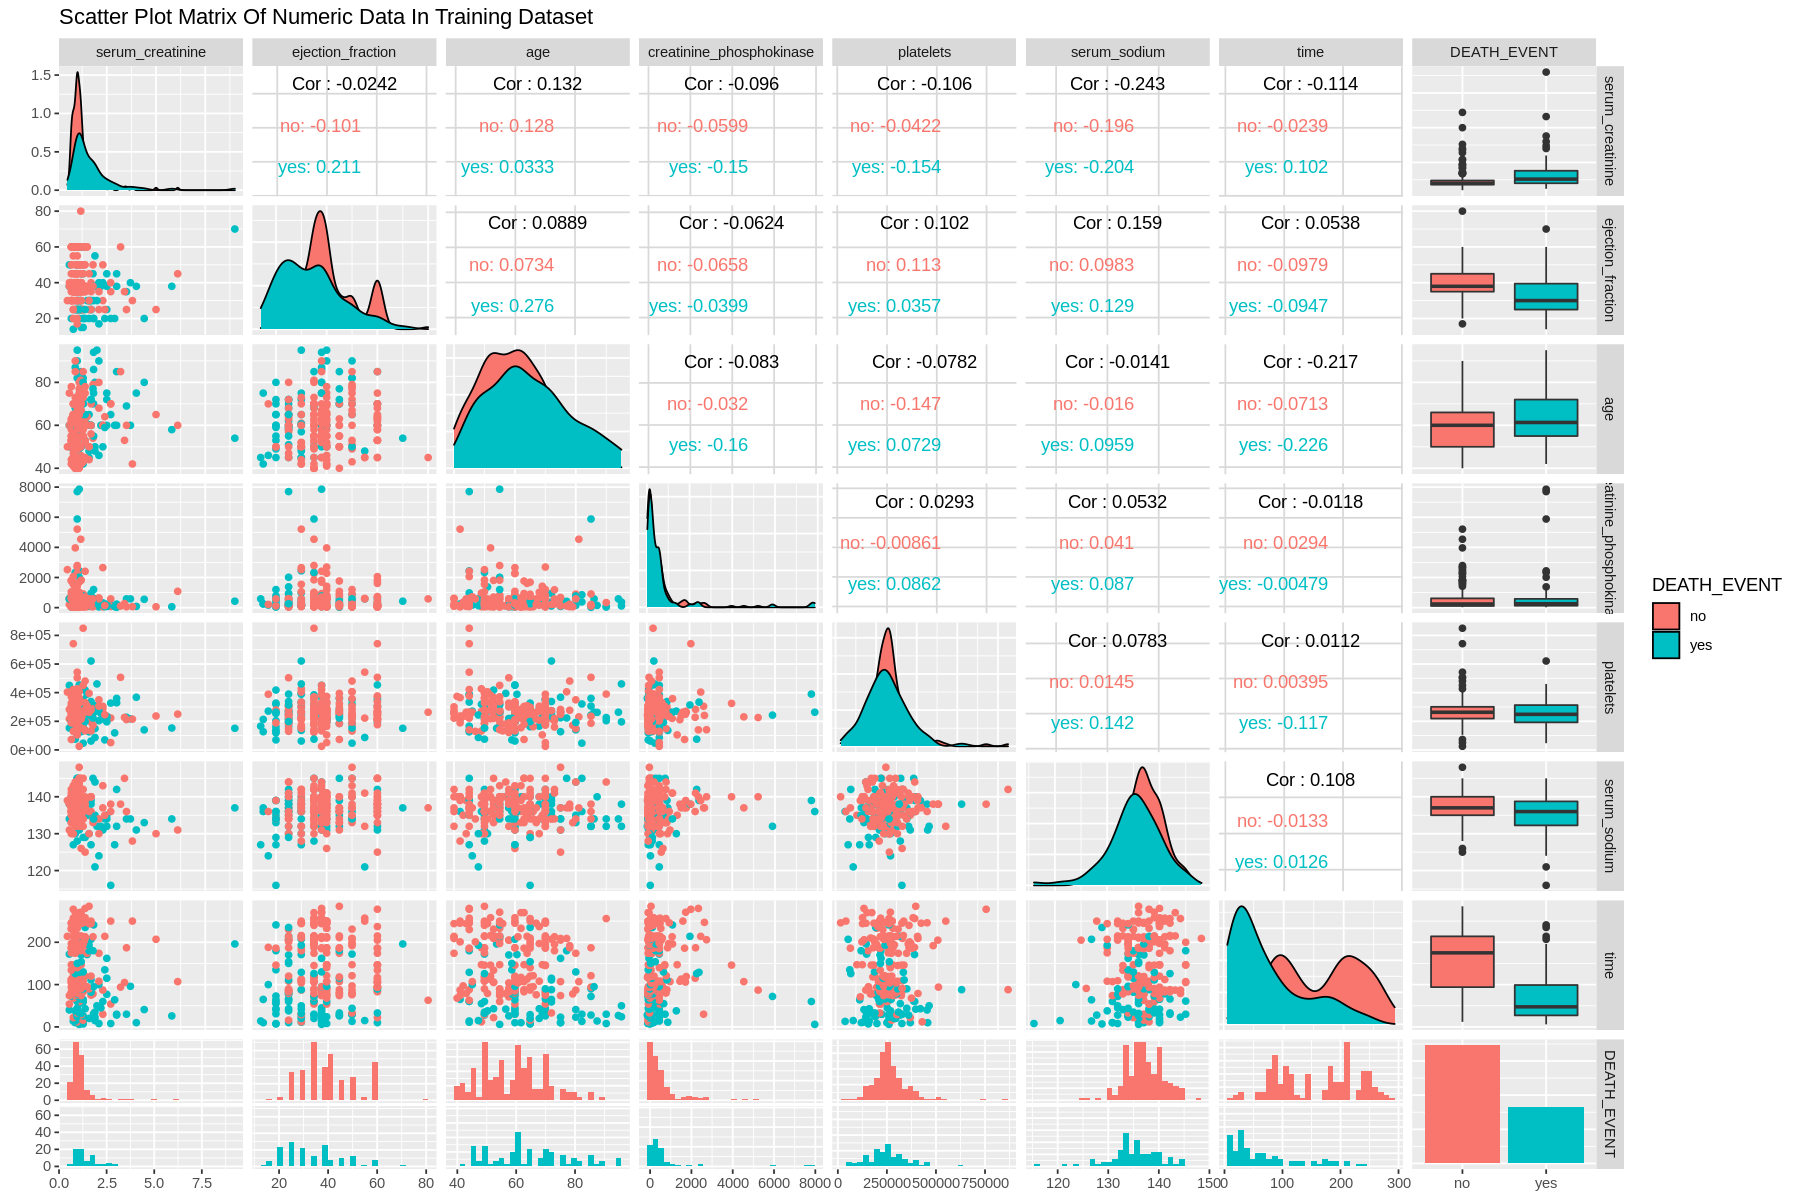

In [19]:
# ggpairs scatter plot matrix

# To observe which variables could be the most useful predictors from this data set, we use ggpairs to build a scatter plot matrix
# of all numeric variables in our data set. To do this, we are using the GGally and ggplot2 packages. In this matrix, each pair of
# numeric pairs are drawn with scatter plots, and for the DEATH_EVENT column, they are drawn with bar plots. Variable distribution 
# is displayed diagonally. The Pearson correlation is displayed on the right of the scatter plots. 

options(repr.plot.width = 15, repr.plot.height = 10)

heart_failure_select <- heart_failure_train %>% 
                        select(serum_creatinine, ejection_fraction, age, creatinine_phosphokinase, platelets,
                               serum_sodium, time, DEATH_EVENT)

ggpairs(heart_failure_select, ggplot2::aes(colour=DEATH_EVENT),
        title = "Scatter Plot Matrix Of Numeric Data In Training Dataset",
        legend = 1)

# From the scatter plots below, we can see that the scatter plot of serum creatinine and ejection fraction display clear separation
# between the two labels of the DEATH_EVENT column. We notice that there are more orange dots (patients that survived) when the 
# serum creatinine levels are low, and the ejection fraction levels are high. There are more turquoise dots (patients died) when the 
# serum creatinine levels are high and the ejection fraction levels are low. We can also visualize this from the variable distribution
# graphs displayed diagonally. 

# We decide not to use variables such as creatinine_phosphokinase, serum_sodium, age, and platelets because the scatter plots with
# these variables do not show identifiable separate groups of orange dots and turquoise dots where we can distinctively say whether a low or 
# high level of that variable will cause death. 


# Prior domain experts that have used this data set to create their prediction model indicated in their research that serum creatinine
# and ejection fraction were the most relevant medical features out of all the variables in the data set to predict the death outcome.

In [23]:
heart_failure_subset <- heart_failure %>%
  select(serum_creatinine, ejection_fraction, age, creatinine_phosphokinase, platelets,
         serum_sodium, time, DEATH_EVENT)

names <- colnames(heart_failure_subset %>% select(-DEATH_EVENT))

heart_failure_subset

serum_creatinine,ejection_fraction,age,creatinine_phosphokinase,platelets,serum_sodium,time,DEATH_EVENT
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1.9,20,75,582,265000,130,4,yes
1.1,38,55,7861,263358,136,6,yes
1.3,20,65,146,162000,129,7,yes
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
0.8,60,45,2060,742000,138,278,no
1.4,38,45,2413,140000,140,280,no
1.6,45,50,196,395000,136,285,no


In [ ]:
# # create an empty tibble to store the results
# accuracies <- tibble(size = integer(), 
#                      model_string = character(), 
#                      accuracy = numeric())

# # create a model specification
# knn_spec <- nearest_neighbor(weight_func = "rectangular", 
#                              neighbors = tune()) %>%
#      set_engine("kknn") %>%
#      set_mode("classification")

# # create a 5-fold cross-validation object
# heart_failure_vfold <- vfold_cv(heart_failure_subset, v = 5, strata = DEATH_EVENT)

# # store the total number of predictors
# n_total <- length(names)

# # stores selected predictors
# selected <- c()

# #for every size from 1 to the total number of predictors
# for (i in 1:n_total) {
#     # for every predictor still not added yet
#     accs <- list()
#     models <- list()
#     for (j in 1:length(names)) {
#         # create a model string for this combination of predictors
#         preds_new <- c(selected, names[[j]])
#         model_string <- paste("DEATH_EVENT", "~", paste(preds_new, collapse="+"))

#         # create a recipe from the model string
#         heart_failure_recipe <- recipe(as.formula(model_string), 
#                                 data = heart_failure_subset) %>%
#                           step_scale(all_predictors()) %>%
#                           step_center(all_predictors())

#         # tune the KNN classifier with these predictors, 
#         # and collect the accuracy for the best K
#         acc <- workflow() %>%
#           add_recipe(heart_failure_recipe) %>%
#           add_model(knn_spec) %>%
#           tune_grid(resamples = heart_failure_vfold, grid = 10) %>%
#           collect_metrics() %>%
#           filter(.metric == "accuracy") %>%
#           summarize(mx = max(mean))
#         acc <- acc$mx %>% unlist()

#         # add this result to the dataframe
#         accs[[j]] <- acc
#         models[[j]] <- model_string
#     }
#     jstar <- which.max(unlist(accs))
#     accuracies <- accuracies %>% 
#       add_row(size = i, 
#               model_string = models[[jstar]], 
#               accuracy = accs[[jstar]])
#     selected <- c(selected, names[[jstar]])
#     names <- names[-jstar]
# }
# accuracies

In [ ]:
# accuracies %>%
#         arrange(accuracy) %>%
#         tail()

In [7]:
heart_failure_vfold <- vfold_cv(heart_failure_train, v = 5, strata = DEATH_EVENT)

# We are tuning every parameter in the model by specifying tune () in the modal specification rather than given a particular 
# value so that we can select an optimum K value.

knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
            set_engine("kknn") %>%
            set_mode("classification")


In [9]:
heart_failure_recipe <- recipe(DEATH_EVENT ~ serum_creatinine + ejection_fraction + time,
                               data = heart_failure_train) %>%
                            step_scale(all_predictors()) %>%
                            step_center(all_predictors())

In [10]:
k_vals <- tibble(neighbors = seq(from = 1, to = 30, by = 1))

knn_results <- workflow() %>%
               add_recipe(heart_failure_recipe) %>%
               add_model(knn_tune) %>%
               tune_grid(resamples = heart_failure_vfold, grid = k_vals) %>%
               collect_metrics()

In [11]:
accuracies <- knn_results %>%
              filter(.metric == "accuracy")
accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.7886335,5,0.02318403,Model01
2,accuracy,binary,0.7886335,5,0.02318403,Model02
3,accuracy,binary,0.8042443,5,0.01873864,Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
28,accuracy,binary,0.7954751,5,0.03204316,Model28
29,accuracy,binary,0.7916290,5,0.02886436,Model29
30,accuracy,binary,0.7916290,5,0.02886436,Model30


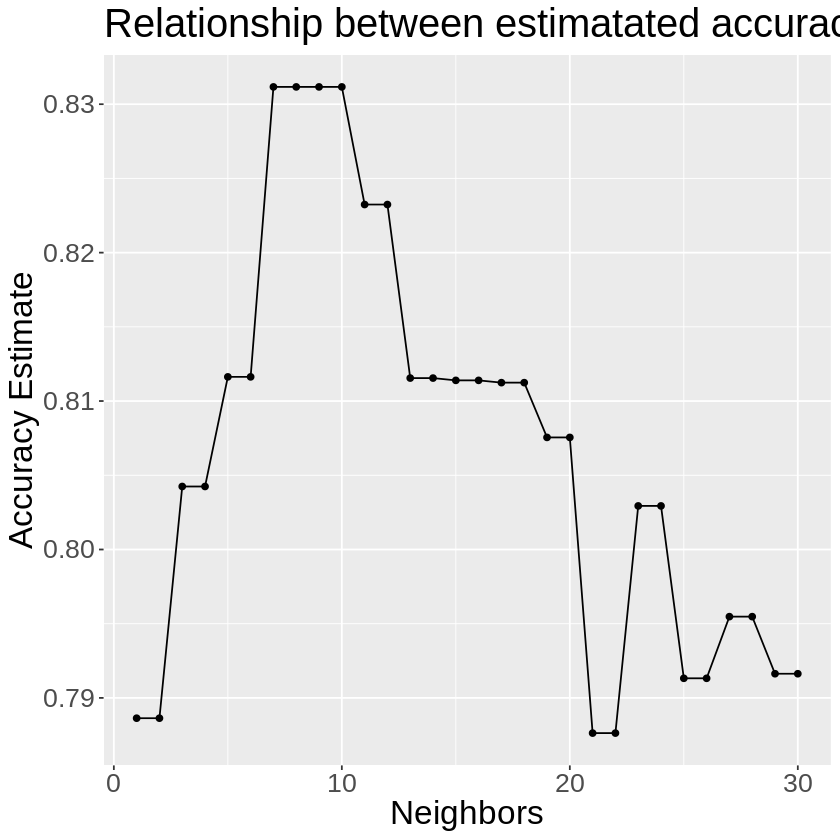

In [12]:
accuracy_vs_k <- accuracies %>%
                ggplot(aes(x = neighbors, y = mean)) +
                geom_point() +
                geom_line() +
                labs(x = "Neighbors", y = "Accuracy Estimate") +
                theme(text = element_text(size = 20)) +
                ggtitle("Relationship between estimatated accuracy and the number of neighbors")

accuracy_vs_k

In [13]:
best_k <- accuracies %>%
          filter(mean == max(mean)) %>%
          select(neighbors) %>%
          slice(1) %>%
          pull()
best_k

[1] 7

In [15]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) %>%
            set_engine("kknn") %>%
            set_mode("classification")

knn_fit <- workflow() %>%
            add_recipe(heart_failure_recipe) %>%
            add_model(knn_spec) %>%
            fit(data = heart_failure_train)

predictions <- predict(knn_fit, heart_failure_test) %>%
                bind_cols(heart_failure_test) %>%
                metrics(truth = DEATH_EVENT, estimate = .pred_class) %>%
                filter(.metric == "accuracy")
predictions

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.9545455


In [17]:
confusion_mat <- predict(knn_fit, heart_failure_test) %>%
                bind_cols(heart_failure_test) %>%
                    conf_mat(truth = DEATH_EVENT, estimate = .pred_class)
confusion_mat

          Truth
Prediction no yes
       no  30   2
       yes  0  12

### Methods & Results:


To predict patients' survival, we use an instance-based learning model, the K-Nearest Neighbors classifier. 85% of the data is used for the training set, and the remaining 15% of data for the testing set, which is divided by using the initial_split function. We choose predictors based on our exploratory data analysis (e.g., plots and tables) and forward selection in R to pick the optimum model that balances high accuracy and model simplicity. Preliminary predictors have been chosen by observing graphs that clearly show separate groupings of deaths and survivors for give predictors. The results from the forward selection process indicated 85% accuracy can be achieved when using ejection fraction, serum creatinine, and time as the quantitative predictor variables. Using the selected predictors, we created a recipe. Then from the vfold_cv function we perform a 5-fold cross-validation on the training set. Using the training data, we created a workflow analysis from our recipe and model specification with a tuning of K values from 1 to 30. After collecting the metrics from the workflow, we picked the K that gives optimal accuracy shown by a K vs accuracy graph. The K value we choose (7) is not prohibitive and has an accuracy similar to nearby K values. We then trained the KNN model with our chosen predictors and K value. To test the accuracy of our model we predicted the target variable labels for unseen testing data using the predict function. Using the confusion matrix on test data we can identify that if the prediction of death is not greatly inaccurate, that would make this model applicable for future observations with unknown labels.  From the metrics function we filtered the accuracy value and got an accuracy of 95%. In other words, 95% predicted labels for the testing data were correct. 


### Discussion:
We found that the KNN-model achieved 95% accuracy of predictions on the testing data when the ejection fraction, serum creatinine, and time are used as predictor variables. Since our classification is for medical purposes, it is crucial to analyze the results from the confusion matrix. Results showed that 30 predictions correctly predicted that the patient survived, 12 predictions correctly predicted that the patient did not survive. Two patients were incorrectly predicted to survive when they actually did not, and zero patients were incorrectly predicted to not survive when they actually did survive. This means that only 4.5% of data incorrectly predicted survival when the patient did not. It is always better to have incorrectly predicted that the patient will not survive, compared to when the model incorrectly predicts that the patient will survive. As a result, underestimating the severity of the patient’s heath they may not receive appropriate medical attention. On the other hand, if a patient is incorrectly predicted to not survive, they will still get expert diagnosis from medical professionals. Therefore, our small error in predicted survival is a good indication our model can be used by medical experts with improvements in the future by collecting more data for the model. 

The majority classifier would achieve a 68% accuracy. Since our classifier provides a significant improvement compared to the majority classifier, this indicated that our method is extracting some useful information from the predictor variables. 

Our finding matches our expectations because ejection fraction, serum creatinine and medical care provided by doctors are essential factors to consider from the patient’s medical history. 

Ejection fraction (EF) is the percentage of blood pumped from the heart during a single contraction. EF is important to consider because a low EF could cause sudden cardiac arrest (SCA) and cause death within minutes. 
Serum creatinine is the level of creatinine in the blood measured in milligrams per decilitre. It is a waste product formed when a muscle breaks down. High amounts of serum creatinine indicate renal dysfunction (kidney failure) and without dialysis treatment, it can cause death. 

Follow-up clinical period measured how many days of pharmacological treatment, and exercise-based rehabilitation the patient received. If the patient has not received adequate medical treatment for the severity of their health conditions, that could lead to death. 

**Long-term Benefits of this model:**
According to (https://link.springer.com/article/10.1007/s40273-020-00952-0), the annual total medical costs for heart failure patients were estimated at $24,383 per patient, with heart failure-specific hospitalizations costs with a median of $15,879 per patient. Substantial medical costs for the treatment of heart failure patients are a crucial reason why detecting patients requiring urgent care is important. Pharmacological treatments, and exercise-based rehabilitation can improve outcomes for patients, particularly those with heart failure with reduced ejection fraction. However, early diagnosis is crucial to allow timely initiation of evidence-based treatments (https://www.bmj.com/content/364/bmj.l223). From the results of our KNN-classification model, medical experts can study the medical records of heart failure patients based on the predictor variables chosen that give high accuracy of predicted outcomes. The success of this model may not only reduce the extortionate medical costs for hardworking families, but it will also accelerate the diagnosis process giving more time for necessary medical attention and improve the effectiveness of medical examinations for future patients. 


Future questions our model could lead to:
- What is the partial impact fraction that could affect our results? (Partial impact fraction quantitates change in the proportion of disease cases if the data is collected for a different population, without changing other prediction factors.)
- What additional information may the doctor need if the predicted outcome is death?
- Can we use our prediction model to predict the survival of patients with other types of cardiovascular diseases?


### References (APA6):
**Source of data - UCI Data:**
Chicco, D. (2020, February 5). Heart failure clinical records Data Set. UCI Machine Learning Repository: Heart Failure Clinical Records Data Set. Retrieved March 2, 2022, from https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records# 

**Literature relevant to the project:**
Chicco, D., & Jurman, G. (2020, February 03). Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone - BMC Medical Informatics and decision making. Retrieved March 30, 2022, from https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5
Taylor, C., Ordóñez-Mena, J., Roalfe, A., Lay-Flurrie, S., Jones, N., Marshall, T., & Hobbs, F. (2019, February 13). Trends in survival after a diagnosis of heart failure in the United Kingdom 2000-2017: Population Based Cohort Study. Retrieved March 30, 2022, from https://www.bmj.com/content/364/bmj.l223
Urbich, M., Globe, G., Pantiri, K., Heisen, M., Bennison, C., Wirtz, H., & Di Tanna, G. (2020, August 19). A systematic review of medical costs associated with heart failure in the USA (2014–2020) - pharmacoeconomics. Retrieved March 30, 2022, from https://link.springer.com/article/10.1007/s40273-020-00952-0
